# Assignment Applied Machine Learning BSc IK 

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: **alleen de hoofdletter** (iets als  `A` of `B` dus)

__Namen__: Tycho Stam, Souad Laaziz, Lars de Jong

__Emails__: tycho.stam@student.uva.nl, souad.laaziz@student.uva.nl, 2002larsdejong@gmail.com

__Student ids__ : 13303147, 139834901, 13978268

__Groep__ : B

## Toelichting

* Een aantal opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Applied Machine Learning W1
 

In [1]:
!pip install nose

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from scipy.stats import mode
from nose.tools import assert_count_equal, assert_equal
from numpy.testing import *
from pandas.testing import assert_frame_equal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
# Please do not remove this: 
np.random.seed(31415)

# Theory

With these questions you and your group will practice your ability to formulate key concepts precisely and short. 
Such questions  also appear in the exams, and are graded quite strict.

Always answer in one grammatically correct English sentence. 

Finish the following sentences:

1. Machine learning algorithms build a model ...
2. Machine learning can be divided into three parts, namely .....
3. Each of these 3 parts can be described as follows:
    1. .... is ....
    1. .... is ....
    1. .... is ....
4. The key difference between regression and classification problems is .....


----------------------

1. Machine learning algorithms build a model based on sample data, in order to make predictions on new unseen data, without being explicitly told to do so. 
2. Unsupervised learning, Supervised learning, Reinforcement learning.
3. 
    1. Unsupervised learning is grouping and sorting. Hereby the details are abstracted.
    1. Supervised learning is learning how to predict a value on a property of unseen items for having seen many examples.
    1. Reinforcement learning is learning with practice and getting feedback everytime.
4. Both are ways to predict a new example. The difference is in the type of the predicted example. By Regression the type is numeric, by classification it will be a class/tag

-------------------------

## Part 0 classification with the iris data set, using knn

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris= datasets.load_iris()

X,y= iris.data, iris.target
print(X.shape,y.shape)
print(X[:5])
print(y)

(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# train test

Use `np.random.choice` to create random `X_train, X_test, y_train, y_test`  such that 

1. 90 train, 60 test
2. Stratified, so an equal amount of cases from each of the three classes in the train and test sets.

Make tests to test that what you create is according to these specs.

## Note about our questions, and how to answer them

Here and later we may ask you to program things explicitly, and thus **not** using a scikit learn or other routine. Please do so, and practice this. We will do the same in the exam. It is important that you understand the algorithms behind the concepts that you use. That is the reason. Also we believe that you understand and remember things better when you have programmed than from scratch.

Of course you can google the answer in a few minutes and copy-paste it. But does that give your satisfaction or gratification? Do you *learn* anything from it? Please do not work like that. You make these assignments with 4 students, so you really have a lot of time. Make them all, compare and discuss the 4 found solutions, improve and refactor  them to one super great siolution. And, if all this does not appeal to you, then maybe this does: at the exam we will also ask these questions, and you do not have access to the web then. 

### making tests

This is an underdeveloped skill with many students. Why? Testing your own answer gives you a good feeling, it often lets you improve your answer, and can also be seen as a way to find the (complete) answer. **Please practice it and take it seriously.** At the exam you will have a notebook too, and so you can also test your own answers. Being skillfull in testing will boost your grade.

In [4]:
# The function np.random.Generator.choice is used because this can handle a 2d array
X_train, y_train = np.random.default_rng().choice(X, 90, axis=0),  np.random.choice(y,90)
X_test, y_test = np.random.default_rng().choice(X, 60, axis=0), np.random.choice(y,60)



In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, shuffle=True, random_state=0)

def check_shape(M):    
    if M.shape in [(90,4),(90,),(60,4),(60,)]:
        return True
    else:
        return False

[check_shape(M) for M in [X_train, y_train, X_test,  y_test]]

[True, True, True, True]

In [6]:
assert_equal(X_train.shape,(90, 4))
assert_equal(X_test.shape,(60, 4))
assert_equal(y_train.shape,(90, ))
assert_equal(y_test.shape,(60, ))

# knn classifier

Program from scratch a knn classifier which can work on data `X` and `y` as you have from the iris dataset.

It returns the most common label in the k nearest neighbors.

### Hints

* use `euclidean` as your distance function
* `X_train[0,:]` picks out the first instance from `X_train`.
* Use *fancy indexing* to take out a number of items from a numpy array. as in `X[8,35,7,2]`.
* `np.argsort` is handy.

In [7]:
from scipy.stats import mode
from scipy.spatial.distance import euclidean


def knn(X,y,example,k=5):
    '''Classify example using majority vote of the k closest items in X with labels y.'''
    kNN_Y = y[np.argsort([euclidean(example, node) for node in X])[:k]]
    return mode(kNN_Y)[0][0]

knn_values = [knn(X_train,y_train,i) for i in X_test[:10]] 
print(knn_values)

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1]


C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\698600086.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(kNN_Y)[0][0]


# Evaluate

Run knn on `X_test` and compare the outcomes to `y_test`.

Come up with a useful and insightfull error report.

In [8]:
y_test[:10], knn_values

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1]), [2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [9]:
# Compare y_test with the knn_values for y
[y_test[:10][i] == knn_values[i] for i in range(len(knn_values))]

[True, True, True, True, True, True, True, True, True, True]

In [10]:
y_pred = [knn(X_train, y_train, i) for i in X_test]
print('Accuracy:{}%'.format((np.array(y_test)==np.array(y_pred)).mean() * 100))

Accuracy:95.0%


C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\698600086.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(kNN_Y)[0][0]


# Make more efficient

1. Estimate what work is done when running knn on one new to be classified instance, given that it has $n$ training examples. 
2. How expensive is the sorting step?
3. Remove the sorting step by programming a heap of size $k$ which contains from the train set already inspected  the $k$ closest instances to the unseen example.

https://en.wikipedia.org/wiki/Heapsort
> By a Heapsort the program creates a binary tree. Whereby the new example will be placed in the tree based on the neighbours.
Heapsort has performance time of $O(n\log{}n)$ 

In [11]:
def knn_heap(X,y,example,k=5):
    '''Classify example using majority vote of the k closest items in X with labels y. 
    For every example calculate the closed neighbours and place them in a heap sort.
    Only keep the 5 closests items and remove the others. Check this for all the items'''
    heap = []
    euclidean_arr = [(euclidean(example, items), i) for i, items in enumerate(X)]
    for distance in euclidean_arr:
        if len(heap) < k:
            heap.append(distance)
            if len(heap) == k:
                heap.sort()
        else:
            farthest = heap[-1]
            if distance < farthest:
                heap[-1] = distance
                heap.sort()
                
    kNN_Y = y[[i[1] for i in heap]]
    return mode(kNN_Y)[0][0]

knn_heap_values = [knn_heap(X_train,y_train,i) for i in X_test[:10]] 
print(knn_heap_values) 

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1]


C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\2635597848.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(kNN_Y)[0][0]


In [12]:
def knn_heap2(X,y,example,k=5):
    heap = []
    euclidean_arr = [(euclidean(example, items), i) for i, items in enumerate(X)]
    for distance in euclidean_arr:
        if len(heap) < k:
            heap.append(distance)
    return heap

[knn_heap2(X_train,y_train,i) for i in X_test[:1]] 

[[(1.183215956619923, 0),
  (4.263801121065568, 1),
  (0.5099019513592784, 2),
  (1.4387494569938155, 3),
  (1.873499399519519, 4)]]

## Mesure performance


In [13]:
import time
iterations = 10

# Calculate time arg sort
start_time = time.perf_counter()

for i in range(iterations):
    [knn(X_train,y_train,i) for i in X_test[:10]]
    
end_time = time.perf_counter()
time_function1 = end_time - start_time

# Calculate time heap sort
start_time = time.perf_counter()

for i in range(iterations):
    [knn_heap(X_train,y_train,i) for i in X_test[:10]]
    
end_time = time.perf_counter()
time_function2 = end_time - start_time

# Compare the execution times
print("Execution time of arg sort:", round(time_function1, 4))
print("Execution time of heap sort:", round(time_function2, 4))

Execution time of arg sort: 0.0598
Execution time of heap sort: 0.0576


C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\698600086.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(kNN_Y)[0][0]
C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\2635597848.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(kNN

## Evaluate

In [14]:
# Compare y_test with the knn_values and knn_heap_values for y
[y_test[:10][i] == knn_values[i] == knn_heap_values[i] for i in range(len(knn_values))]

[True, True, True, True, True, True, True, True, True, True]

In [15]:
y_pred = [knn_heap(X_train, y_train, i) for i in X_test]
print('Heap Accuracy:{}%'.format((np.array(y_test)==np.array(y_pred)).mean() * 100))

Heap Accuracy:95.0%


C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\2635597848.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(kNN_Y)[0][0]


# Predicting a value with knn-regression

## Part 1: Loading the data into a Pandas Data Frame  

The descriptions of the columns of the dataset can be found here:

**pop**: population

**pctUrban**: percentage of people living in areas classified as urban

**medIncome**: Median Income

**pct12-29**: percentage of population that is 12-21 in age

**pct65up**: percentage of population that is 65 and over in age

**pctPoverty**: percentage of people under the poverty level

**pctAllDivorc**: percentage of population who are divorced

**pctUnemploy**: percentage of people 16 and over, in the labor force, and unemployed

**perHoush**: mean persons per household

**pctHousOccup**: percent of housing occupied

**persHomeless**: number of homeless people

**persEmergShelt**: number of people in homeless shelters

**nonViolPerPop**: total number of non-violent crimes per 100K popuation

**State**: the state in which this town/city is located

**countyCode**: the code number of the county of the state this town/city is located



### Question 1a:
Load the data into a Pandas DataFrame. At this point, make sure that you only load the following columns: 

`'pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 'pctAllDivorc', 'pctUnemploy', 'perHoush', 'pctHousOccup', 'persHomeless', 'persEmergShelt', 'nonViolPerPop'`


Here and elsewhere, when we load data, always use the `loadfile()` command. Like in `pd.read_csv(loadfile())`. We do this because when we (auto)grade we have the file not in the same directory as the notebook.

In [16]:
def loadfile():
    if 'crime_data.csv.gz' in os.listdir():
        return 'crime_data.csv.gz'
    elif os.path.exists('../../data/Week1/'):
        return '../../data/Week1/crime_data.csv.gz'
    elif os.path.exists('../../../data/Week1/'):
        return '../../../data/Week1/crime_data.csv.gz'
    


In [17]:
# Load the dataset
crime_data = pd.read_csv(loadfile())
crime_data = crime_data[['pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 'pctAllDivorc',
                        'pctUnemploy', 'perHoush', 'pctHousOccup', 'persHomeless', 'persEmergShelt', 'nonViolPerPop']]


print(crime_data.shape)
crime_data.head()

(949, 13)


pop  pctUrban  medIncome  pct12-29  pct65up  pctPoverty  pctAllDivorc  \
0  11980.0     100.0    75122.0     21.44    11.33        1.96          4.47   
1  23123.0     100.0        NaN     21.30    17.18        3.98          5.42   
2      NaN       0.0        NaN     40.53    12.65       29.99          9.73   
3  28700.0     100.0    42805.0     27.41    14.42        4.01          7.64   
4  74111.0     100.0        NaN     35.16     8.58       13.68          8.64   

   pctUnemploy  perHoush  pctHousOccup  persHomeless  persEmergShelt  \
0         2.70      3.10         98.37             0              11   
1         2.43      2.82         97.15             0               0   
2         9.08      2.76         92.45             0               2   
3         4.85      2.60         95.11             0               0   
4         4.18      2.46         95.07            15             125   

   nonViolPerPop  
0        1394.59  
1        1955.95  
2        9988.79  
3        1890.88  
4        4747.58

In [18]:
assert_equal(crime_data.shape,(949, 13))
assert_count_equal(crime_data.columns,['pop',
            'pctUrban',
            'medIncome',
            'pct12-29',
            'pct65up',
            'pctPoverty',
            'pctAllDivorc',
            'pctUnemploy',
            'perHoush',
            'pctHousOccup',
            'persHomeless',
            'persEmergShelt',
            'nonViolPerPop'
           ])

### Question 1b:
We want to predict the number of crimes. Identify the features X and the target variable Y, and turn the X and Y DataFrames into Numpy arrays.

Make sure `Y` is of shape `(949, 1)`.

In [19]:
X = crime_data[['pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 'pctAllDivorc', 'pctUnemploy', 'perHoush', 'pctHousOccup', 'persHomeless', 'persEmergShelt']].to_numpy()
Y = crime_data[['nonViolPerPop']].to_numpy()

print(type(X))
print(X.shape,Y.shape)
print(X[:3])
print(Y[:5])

<class 'numpy.ndarray'>
(949, 12) (949, 1)
[[1.1980e+04 1.0000e+02 7.5122e+04 2.1440e+01 1.1330e+01 1.9600e+00
  4.4700e+00 2.7000e+00 3.1000e+00 9.8370e+01 0.0000e+00 1.1000e+01]
 [2.3123e+04 1.0000e+02        nan 2.1300e+01 1.7180e+01 3.9800e+00
  5.4200e+00 2.4300e+00 2.8200e+00 9.7150e+01 0.0000e+00 0.0000e+00]
 [       nan 0.0000e+00        nan 4.0530e+01 1.2650e+01 2.9990e+01
  9.7300e+00 9.0800e+00 2.7600e+00 9.2450e+01 0.0000e+00 2.0000e+00]]
[[1394.59]
 [1955.95]
 [9988.79]
 [1890.88]
 [4747.58]]


In [20]:
assert isinstance(X, np.ndarray)
assert isinstance(y, np.ndarray)
assert_equal(X.shape,(949, 12))
assert_equal(Y.shape,(949, 1))

## Part 2: Split the data into a training set and a test set 
### Question 2:
Split the data into a training and a test set, using teh appropriate sklearn function. Use a  70%-30% split.  
Print the number of examples in the training set and the test set.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=True, random_state=0)


for M in [X_train, X_test, Y_train, Y_test]:
    print(M.shape)

(664, 12)
(285, 12)
(664, 1)
(285, 1)


In [22]:
assert X_train.shape== (664, 12)
assert Y_test.shape== (285,1)


## Part 3: Knn Regression [2 pts]

In [23]:
# figure out what this means, and what does it mean when taking the sum?
crime_data.isna().sum()

pop               95
pctUrban           0
medIncome         95
pct12-29           0
pct65up            0
pctPoverty         0
pctAllDivorc       0
pctUnemploy        0
perHoush           0
pctHousOccup       0
persHomeless       0
persEmergShelt     0
nonViolPerPop      0
dtype: int64

> We calculate the amount of missing values for each column. So the column pop has a total of 95 missing values

In [24]:
np.isnan(X_test)#.sum(0)

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [25]:
np.isnan(X_test[:,0])#.sum()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False,

**Missing Data**: Often the data you are considering is incomplete. For example in some city, the number of homeless people might be unknown. In this case, if you look into the datasets you will find the value *NaN*. This is not a real value, hence Linear Regression cannot handle it.

The question is how can we handle missing data. There are many ways to do so, some more sophisticated than others. Here we will use a simple approach. This simple approach fills in the missing values, i.e. replaces the *NaN* by the median of the corresponding feature. E.g. if there is a *NaN* value for the population in one city, this *NaN* value will be replaced by the median number of the population in all other cities in the data.

1. figure out what this code  `np.isnan(X_test).sum(axis=0), np.isnan(X_train).sum(axis=0) `    is doing. Remove the `axis=0`, and replace it by `axis=1`. You get it?
2. What is the median of the values in the first column of `X_test`?  (variable `v2`)
    * Why does `np.median` not work ;-) You are close though! 
3. Create the first column of X_test in which you replaced all nan values by the median of the first column. (variable `v3`)
5. Then do this for all columns at once   using Scikit learn's `SimpleImputer`.
    * So the new `X_train` and `X_test` have no more missing values.
6. Check that you get exactly the same result using your own method and sklearn's.  

In [26]:
v2= np.nanmedian(X_test[:,0])
v3= np.nan_to_num(X_test[:,0], nan=v2)

print(v2)
print(v3[:10])
print(np.isnan(v3).sum())
# naize test
# all places in v3 which were nan in  X_test[:,0] are now equal to v2
print(v3[np.isnan(X_test[:,0])]==v2)

21605.0
[27244. 22353. 17637. 56177. 32383. 10793. 10823. 22097. 16162. 25925.]
0
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [27]:
assert isinstance(v2,np.float) 
assert np.isnan(v3).sum()==0

C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\346195263.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert isinstance(v2,np.float)


In [28]:
# Fill in the missing data in the dataset (i.e. replace NaN values in both X_train and X_test) 
from sklearn.impute import SimpleImputer

X_train = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(X_train)
X_test = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(X_test)

print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())
print(X_test[:,0])

0
0
[  27244.   22353.   17637.   56177.   32383.   10793.   10823.   22097.
   16162.   25925.   53008.   12454.   12926.   60838.   11329.   21605.
   21605.   10828.   19513.  231636.   14536.   54052.   16064.  122700.
   30270.   16786.   10830.   11538.   10639.   54718.   26609.   13198.
   10104.   55180.   36701.   30548.   11739.   29092.   28158.   26840.
   10531.   41194.   13597.   21605.   21605.   22935.   53418.  632270.
   39757.  286215.   30510.   27099.   21605.   17173.   13083.   24544.
   16946.   15945.   22539.   19821.  103439.   50677.   27134.   15571.
   48718.   49676.   14936.   25067.   21977.  606900.  140761.   18820.
   24309.   12339.   27603.   10742.   31933.   31846.   21605.   12747.
   28658.  228537.   16230.   14837.   22355.   13882.   21605.   17076.
   43877.   11951.   88675.   14514.   10539.   15489.   31468.   12361.
   20820.   11929.   50889.   22095.   38372.   21605.   19757.   10988.
   15216.  328123.   12623.   45061.   21605.  

In [29]:
assert_equal(np.isnan(X_train).sum(),0)
assert_equal(np.isnan(X_test).sum(),0)


# Check that you get exactly the same result using your own method and sklearn's.



In [30]:
X_test[np.isnan(X_test)] = np.nanmedian(X_test)
X_train[np.isnan(X_train)] = np.nanmedian(X_train)

(X_test == SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(X_test)).all(), (X_train == SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(X_train)).all()

(True, True)

# KNN

Make now the KNN regression algorithm from scratch.

* use euclidean again 
* use `np.argsort` and `[:k]` to find the indexes of the k nearest neighbor rows
* use so called *fancy indexing* on numpy array 
    * `X_train[[2,5,3]]` gives the 2D array with the 2nd, 5th and 3rd row of `X_train`.


## Evaluate with RMSE (root mean square error)

1. Program the formula for RMSE from scratch 
2. Compute `Y_predicted`
3. Compute the RMSE for the kNN algorithm on this dataset.

## Do the same for $R^2$.

In [31]:
from scipy.spatial.distance import euclidean

def knn(ExamplesX,ExamplesY,instance,k=5):
    distance = np.argsort([euclidean(instance, example) for example in ExamplesX])[:k]
    kNN_Y = np.array(ExamplesY[distance])
    return kNN_Y.mean()

knn(X_train,Y_train,X_test[0,:]), Y_test[0]

(5395.032, array([4945.8]))

## $$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{y})^2}{n}}$$
<!-- ## $$ \textrm{rmse} = \sqrt{\frac{1}{N}\sum_{i=1}^N(a_i - p_i)^2} $$ -->

In [1]:
def rmse(u,v): ## u, v are 1D arrays of the same length
    if len(u) == len(v):
        return np.sqrt(np.mean([(u[i] - v[i])**2 for i in range(len(u))]))

rmse([2,3,5,6,7,34],[2,3,5,6,7,34])

NameError: name 'np' is not defined

### $$SS_{res} = \sum_{i}(y_i - f_i)^2 = \sum_{i}e_i^2 $$
### $$SS_{tot} = \sum_{i}(y_i - \hat{y})^2 $$

In [33]:
# def rsquare(predicted,true): ## u, v are 1D arrays of the same length
#     if len(predicted) == len(true):
#         return 1 - sum((y - np.mean(true))**2 for y in true) / sum((y - y_hat)**2 for y in true for y_hat in predicted) 

# rsquare([2,3,5,6,7,34],[2,3,5,6,7,34])

def rsquare(predicted, true):
    SS_res = sum((np.array(true) - np.array(predicted))**2)
    SS_tot = sum((true - np.mean(true))**2)
    return 1 - SS_res / SS_tot
rsquare([2,3,5,6,7,34],[2,3,5,6,7,34])

1.0

With the RMSE we can measure the differences  between the values predicted and the values observed

In [34]:
Y_predicted = np.asarray([knn(X_train,Y_train,i) for i in X_train[:10]])
RMSE= rmse(Y_predicted, y_test[:10])


Y_predicted.shape, RMSE 

((10,), 4720.334422691088)

# What is happening here?

* Explain what we are doing in the next cell.
* Is this according to your intuition?

In [35]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)

Y_predicted2= neigh.predict(X_test )

rmse(Y_predicted2,Y_test)

2411.617094885481

> We are calculating the regression based on KNN with a neigborhood size of 5. We fit the model with our trainingsdata. We predict the data based on the predict function.

> I expected the RMSE to be lower

# Normalization


## Z- transformation

* We transform the data such that each kolom has a mean of 0 and a standard deviation of 1.

## Unit normalization

* We transform the data such that each row has unit norm.
* A unit normn of a vector $v$ means that its length equals 1, that is $\sqrt{v\cdot v}$ equals 1, where $v\cdot v$ is the dot product of $v$ with itself, that is $\Sigma_i v_i\cdot v_i$.


## Your task

* Implement both normalisations of a matrix and **make tests to check that they work correctly**.
    * Check out `np.linalg.norm?`
    * Tests are real computer tests. Not a print that you then check with your eyes.
    * So use `assert` statements, or make a test which returns True.
    * Of course you may add a useful print. 
* Do not use predefined functions for these normalisations, but program them from the here given definitions.
* Finally check that they give the same results as the [scikit learn normalizer](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) and [standardizer](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

<!-- :math:$||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}$ -->

In [36]:
# Assume M is a np.array
def standardize(M):
    return (M - np.mean(M, axis=0)) / np.std(M, axis=0)
    
    
def normalize(X):    
    norms = np.reshape(np.linalg.norm(X, axis=1), (X.shape[0],1))
    return X / norms
    
    
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])  


standardize(X), normalize(X)

(array([[ 0.        , -1.22474487,  1.33630621],
        [ 1.22474487,  0.        , -0.26726124],
        [-1.22474487,  1.22474487, -1.06904497]]),
 array([[ 0.40824829, -0.40824829,  0.81649658],
        [ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.70710678, -0.70710678]]))

In [37]:
standardize(X_train), normalize(X_train)

(array([[-0.20648828,  0.61057587, -0.4116077 , ...,  0.66985436,
         -0.09549684, -0.18464943],
        [-0.21708579, -2.00005007, -0.98473276, ...,  0.24433215,
         -0.09549684, -0.18464943],
        [-0.2067443 , -2.00005007, -0.29685872, ..., -0.11058773,
         -0.09549684, -0.18464943],
        ...,
        [-0.1552618 , -0.02954961,  0.3738146 , ...,  0.61833373,
         -0.09549684, -0.18464943],
        [-0.17612323, -2.00005007, -1.16518541, ...,  0.16991346,
         -0.09549684, -0.18464943],
        [-0.1339349 , -0.05643906,  0.19855316, ...,  0.70610962,
         -0.09549684, -0.18464943]]),
 array([[0.39876146, 0.00276995, 0.9170461 , ..., 0.00270374, 0.        ,
         0.        ],
        [0.45206144, 0.        , 0.89198001, ..., 0.0033091 , 0.        ,
         0.        ],
        [0.38350653, 0.        , 0.92353434, ..., 0.00249708, 0.        ,
         0.        ],
        ...,
        [0.43681445, 0.00157011, 0.89954779, ..., 0.00202484, 0.        

Here in the answer cell below:

* your own tests
*  tests that scikit learn functions do the same


In [38]:
from sklearn import preprocessing
# Check if standardize function is the same as scikit standardizer
print("Check if standardize functions are equal:\n", preprocessing.StandardScaler().fit_transform(X) == standardize(X))
print("Check if normalize functions are equal:\n", preprocessing.Normalizer().fit_transform(X) == normalize(X))

Check if standardize functions are equal:
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
Check if normalize functions are equal:
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [39]:
assert_equal(X.shape, normalize(X).shape)
assert_equal(X.shape, standardize(X).shape)


### Question 3
 
 
* Do the KNN regression again but now on the normalized data.
* Conclude.

In [40]:
X_train[:3], X_test[:3], Y_train[:3]

(array([[1.4396e+04, 1.0000e+02, 3.3107e+04, 2.2840e+01, 1.8150e+01,
         5.0000e+00, 9.8700e+00, 4.5500e+00, 2.4000e+00, 9.7610e+01,
         0.0000e+00, 0.0000e+00],
        [1.3030e+04, 0.0000e+00, 2.5710e+04, 2.3980e+01, 1.4810e+01,
         9.0900e+00, 7.7800e+00, 4.5700e+00, 2.5200e+00, 9.5380e+01,
         0.0000e+00, 0.0000e+00],
        [1.4363e+04, 0.0000e+00, 3.4588e+04, 2.9530e+01, 9.2100e+00,
         6.7600e+00, 9.8800e+00, 7.8600e+00, 2.8700e+00, 9.3520e+01,
         0.0000e+00, 0.0000e+00]]),
 array([[2.7244e+04, 7.0760e+01, 3.5138e+04, 2.8130e+01, 1.4330e+01,
         5.7400e+00, 6.7700e+00, 7.8500e+00, 2.9600e+00, 9.2000e+01,
         0.0000e+00, 0.0000e+00],
        [2.2353e+04, 0.0000e+00, 3.6215e+04, 2.7070e+01, 6.3700e+00,
         2.8200e+00, 9.5500e+00, 3.3700e+00, 2.6100e+00, 9.4430e+01,
         0.0000e+00, 1.4000e+01],
        [1.7637e+04, 1.0000e+02, 1.8617e+04, 2.9430e+01, 1.2790e+01,
         2.2330e+01, 1.2820e+01, 9.8500e+00, 2.6500e+00, 9.0540e+01,


In [41]:
def knn_normalize(X,y,example,k=5):
    '''Classify example using majority vote of the k closest items in X with labels y.'''
    kNN_Y = y[np.argsort([euclidean(example, node) for node in X])[:k]]
    return mode(kNN_Y)[0][0]

np.round([knn_normalize(normalize(X_train),Y_train,example) for example in normalize(X_test[:10])],2)

C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\657782433.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(kNN_Y)[0][0]


array([[1736.45],
       [3590.24],
       [2893.5 ],
       [2543.13],
       [ 699.77],
       [ 516.16],
       [2607.86],
       [2631.94],
       [2739.59],
       [2840.48]])

In [42]:
np.round([knn(normalize(X_train),Y_train,example) for example in normalize(X_test[:10])],2)

array([4416.32, 4286.95, 4305.51, 4001.68, 3710.87, 4127.27, 3416.02,
       4259.19, 4359.94, 5876.87])

> When doing the KNN with normalized data a different amount of crime is shown based on the values

# Improving KNN

With KNN each neighbour is equal, as we take the mean or the majority class. Now, we may change KNN by *weighing* the imprtance of the neighbors, for instance with the distance or similarity. 

Implement that improvement:

* find an easy way to create weights from distances.
* normalize these weighjts so that the weights of all neighbours add up to 1.
* find out the wonderfullness of the *dot product*, see how you take the dot product of 2 numpy arrays, and, well, use it to compute the weighted mean, basically by saying *weights times values*. 

* Work it out using the tips dataset for which you predict the tip from the total bill.
* Do all steps we do in an ML project and predict the tip using KNN regression with weighted neighbors.

 

(244, 7)


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

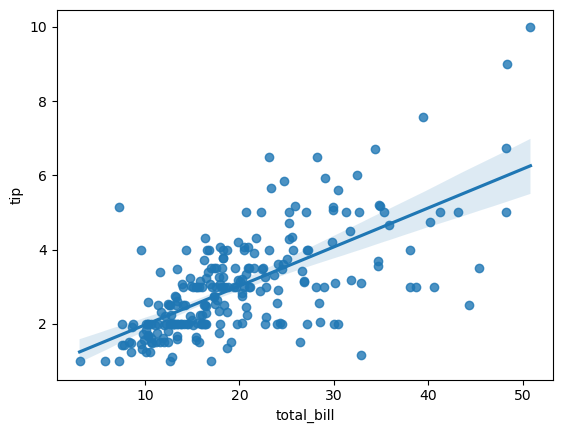

In [43]:
tips = sns.load_dataset('tips')
print(tips.shape)
sns.regplot(x='total_bill', y='tip', data=tips);
tips.head()

# Male vs Female

We  wonder if males tip differently than females. We first investigate visually. Then we compute.

1. Add `hue='sex'` to the `sns.scatterplot` command. 
2. Simply plot two regplots on top of each other, one for the males, one for the females.
   * Of course you use Boolean indexing to restrict `data` to the required sex.
3. Read up what those shaded areas in the `regplot` mean. Can you draw a conclusion about male vs female tipping?
4. Finally run your weighted KNN and a scikit learn linear regression, and plot the regression line, the true values and the KNN-predicted tips for the test-set. Can you conclude something?

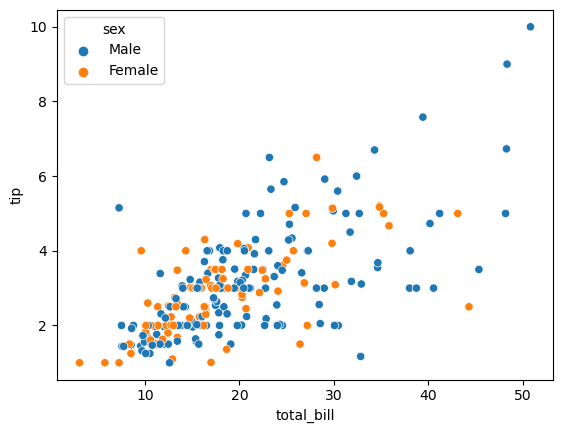

In [44]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex');

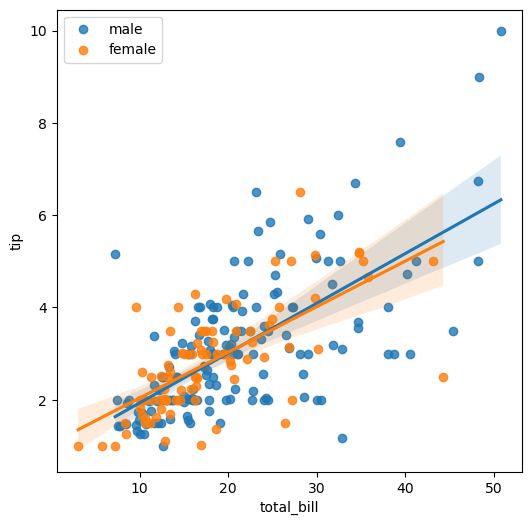

In [45]:
import matplotlib.pyplot as plt
# https://stackoverflow.com/questions/36026149/how-to-plot-multiple-linear-regressions-in-the-same-figure
# create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='total_bill', y='tip', data=tips[tips['sex'] == 'Male'], label='male');
sns.regplot(x='total_bill', y='tip', data=tips[tips['sex'] == 'Female'], label='female');
ax.set(xlabel='total_bill', ylabel='tip')
ax.legend()
plt.show()

> The shaded area is the confidence interval. Most of the time the confidence interval is 95%, so that means that 95% of the time the true value lies with the shaded area.

In [46]:
# Change data to int
# tips['sex'] = tips['sex'].replace({'Male':0, 'Female':1})
# tips['smoker'] = tips['smoker'].replace({'No':0, 'Yes':1})
# tips['day'] = tips['day'].replace({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})
# tips['time'] = tips['time'].replace({'Lunch':0, 'Dinner':1})

# Split the tips data 
# X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']].to_numpy()
X = tips[['total_bill', 'size']].to_numpy()
y = tips['tip'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=0)

In [47]:
def knn_weighted(X,y,example,k=5):
    '''Classify example using majority vote of the k closest items in X with labels y.'''
    weighted_distance = [1 / (euclidean(example, node) + 1e-8)  for node in X]
    sorted_weighted = np.argsort(weighted_distance / np.sum(weighted_distance))
    kNN_Y = y[sorted_weighted]
#     return kNN_Y.mean()
    return mode(kNN_Y)[0][0]

knn = [knn_weighted(X_train,y_train,example) for example in X_test]

C:\Users\Tycho\AppData\Local\Temp\ipykernel_2908\635086374.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(kNN_Y)[0][0]


In [48]:
X_axis = np.array([x[0] for x in X_test])

In [49]:
print('Heap Accuracy:{}%'.format((np.array(y_test)==np.array(knn)).mean() * 100))

Heap Accuracy:8.108108108108109%


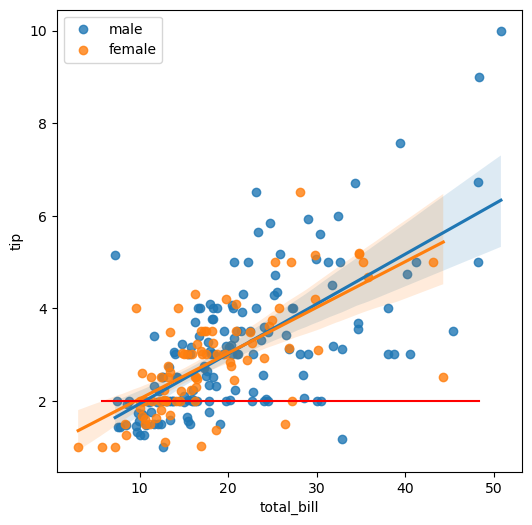

In [50]:
import matplotlib.pyplot as plt
# https://stackoverflow.com/questions/36026149/how-to-plot-multiple-linear-regressions-in-the-same-figure
# create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='total_bill', y='tip', data=tips[tips['sex'] == 'Male'], label='male');
sns.regplot(x='total_bill', y='tip', data=tips[tips['sex'] == 'Female'], label='female');
sns.lineplot(x=X_axis.ravel(), y=knn, color='red')

ax.set(xlabel='total_bill', ylabel='tip')
ax.legend()
plt.show()

> The current conclusion is that the weighted knn has an error somewhere, because this result isn't valid. Currently it has an accury of 8.1%